In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [6]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [11]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200713/Bead1/Discharge/', max_file=159)

172  files in folder
159  files loaded


In [17]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  1762160987.4896462
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  1178379618.1851847
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  541816207.9981688
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  213297335.2201284
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  32975078.02862087
***************************************************
Z2-amplitude:  1.17e+03
reduced chi2:  25705.722264426262
***************************************************
Z2-amplitude:  3.78e+03
reduced chi2:  52352.93362822068
***************************************************
Z2-amplitude:  9.90e+03
reduced chi2:  246186.59152660475
***************************************************
Z2-amplitude:  1.19e+04
reduced chi2:  232144.4033040447
***************

***************************************************
Z2-amplitude:  8.49e+03
reduced chi2:  62009.65667759282
***************************************************
Z2-amplitude:  7.57e+03
reduced chi2:  76312.1990419542
***************************************************
Z2-amplitude:  7.59e+03
reduced chi2:  24463.404972928154
***************************************************
Z2-amplitude:  7.67e+03
reduced chi2:  22929.238863663173
***************************************************
Z2-amplitude:  7.77e+03
reduced chi2:  30864.6308412762
***************************************************
Z2-amplitude:  7.80e+03
reduced chi2:  89955.32577748332
***************************************************
Z2-amplitude:  7.63e+03
reduced chi2:  60882.57421874683
***************************************************
Z2-amplitude:  7.26e+03
reduced chi2:  52192.02097991525
***************************************************
Z2-amplitude:  7.19e+03
reduced chi2:  54160.80030511315
*******************

In [50]:
# phases = [m_.values[2] for m_ in m1]
amps = [m_.values[0] for m_ in m1]
# amps2 = [m_.values[0] for m_ in m1]

In [49]:
m1[0].values

<ValueView of Minuit at 339b3728>
  A: 11.561107879178634
  A2: 0.14744332841359897
  f: 71.0
  f2: 71.0
  phi: -0.061682317004637
  delta_phi: 0.07889019548895959

<IPython.core.display.Javascript object>


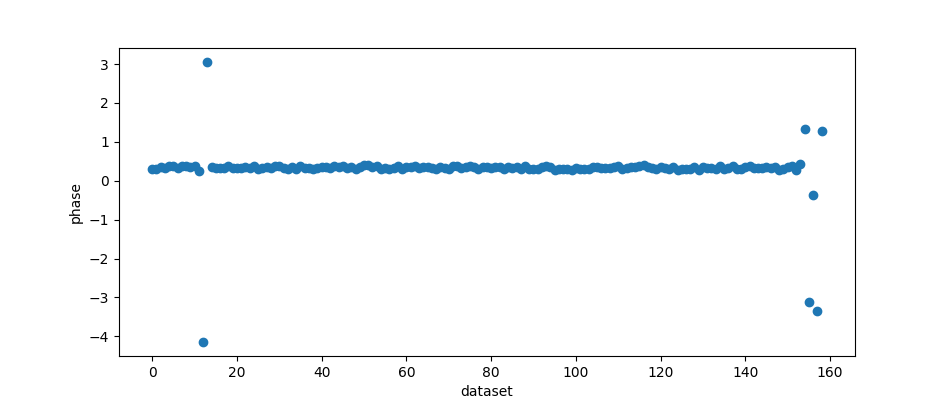

0.33794704056726643


In [16]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(phases)), phases)
ax.set(xlabel='dataset', ylabel='phase')
print(np.mean(phases[20:140]))

In [44]:
amps[128]*=2

<IPython.core.display.Javascript object>


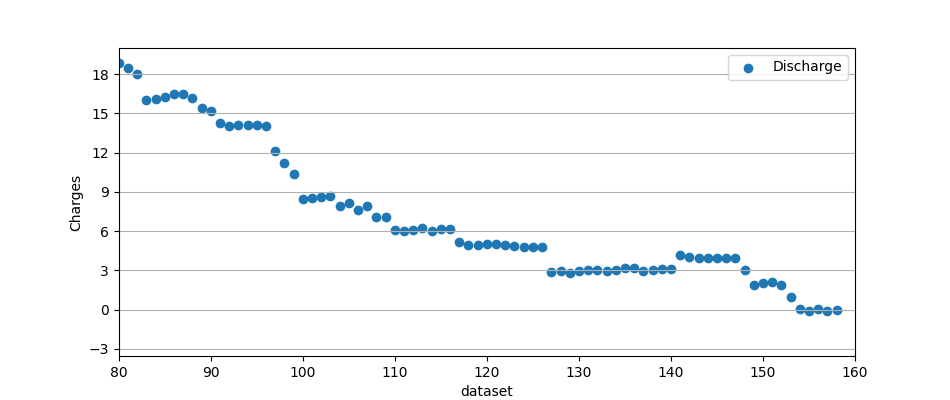

In [45]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 10.3

ax.scatter(range(len(amps)), np.array(amps)/scale/extra_scale, label='Discharge')
# ax.scatter(range(len(amps2)), np.array(amps2)/scale/extra_scale, label='Discharge3 - bimodal')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,20), xlim=(80,160))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [7]:
bdf_force = load_dir(dirname='/data/new_trap/20200713/Bead1/ForceCalibration0713/', max_file=159)

45  files in folder
45  files loaded


In [148]:
m1 = gfw.build_x_response(bdf_force[35:40], drive_freq=71, charges=3, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.1575478446624622
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.19183576502863875
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.20882845097058525
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.19259134010097406
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.17434307364482055
X3 to X2 ratio: 0.14873827240495796
X2 response (amplitude): 11.685305312312039
X2 response (amplitude): 11.685305312312039


In [149]:
phase1_x = [m_.values[4] for m_ in m1]
phase2_x = [m_.values[5] for m_ in m1]
amps1_x = [m_.values[0] for m_ in m1]
amps2_x = [m_.values[1] for m_ in m1]

<IPython.core.display.Javascript object>


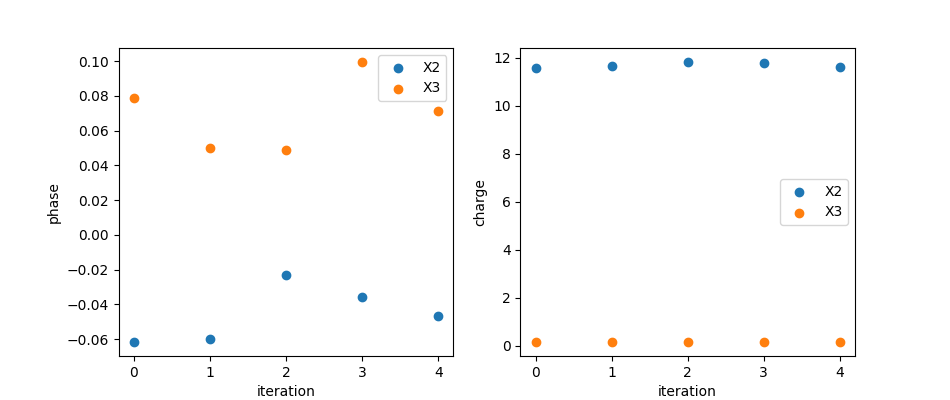

[Text(0, 0.5, 'charge'), Text(0.5, 0, 'iteration')]

In [150]:
scaleX = gfw.scale_X2*1.6e-19 * 20 / 8e-3 * 0.61
scaleX3 = gfw.A2_mean/3

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(5), phase1_x, label='X2')
ax[0].scatter(range(5), phase2_x, label='X3')
ax[1].scatter(range(5), amps1_x, label='X2')
ax[1].scatter(range(5), amps2_x, label='X3')
[a.legend() for a in ax]
ax[0].set(xlabel='iteration', ylabel='phase')
ax[1].set(xlabel='iteration', ylabel='charge')

In [255]:
bdf_mCharge = load_dir(dirname='/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/', start_file=5000, max_file=1)

6000  files in folder
1  files loaded


In [243]:
m10 = gfw.build_x_response(bdf_mCharge, drive_freq=71, charges=3, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  2.46e-02
reduced chi2:  0.2324422931792454
***************************************************
X2-amplitude:  1.20e-01
reduced chi2:  0.1268948199360476
***************************************************
X2-amplitude:  1.18e-02
reduced chi2:  0.3792293429431277
***************************************************
X2-amplitude:  1.67e-02
reduced chi2:  0.2632686346204189
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.2759501639933026
***************************************************
X2-amplitude:  1.28e-01
reduced chi2:  0.21427459368450996
***************************************************
X2-amplitude:  1.17e-01
reduced chi2:  0.6778788597728701
***************************************************
X2-amplitude:  2.95e-02
reduced chi2:  0.5653140469012018
***************************************************
X2-amplitude:  2.38e-02
reduced chi2:  0.37953184589554684
********

***************************************************
X2-amplitude:  5.10e-02
reduced chi2:  0.16816959837817994
***************************************************
X2-amplitude:  1.58e-01
reduced chi2:  0.15486259259597854
***************************************************
X2-amplitude:  2.67e-01
reduced chi2:  0.24454830289766777
***************************************************
X2-amplitude:  1.45e-01
reduced chi2:  0.09495104260172535
***************************************************
X2-amplitude:  1.62e-02
reduced chi2:  0.15384642972667714
***************************************************
X2-amplitude:  3.17e-01
reduced chi2:  0.1723857584349595
***************************************************
X2-amplitude:  1.71e-01
reduced chi2:  0.13072087712414282
***************************************************
X2-amplitude:  1.64e-01
reduced chi2:  0.33076999215345865
***************************************************
X2-amplitude:  4.38e-02
reduced chi2:  0.5538507140740677
***

***************************************************
X2-amplitude:  6.62e-02
reduced chi2:  0.20880428252836636
***************************************************
X2-amplitude:  1.01e-01
reduced chi2:  0.12913386448748088
***************************************************
X2-amplitude:  1.33e-01
reduced chi2:  0.5709295603904356
***************************************************
X2-amplitude:  6.58e-02
reduced chi2:  0.44148522340521357
***************************************************
X2-amplitude:  3.59e-01
reduced chi2:  0.47174709886717725
***************************************************
X2-amplitude:  4.45e-02
reduced chi2:  0.3481578005047222
***************************************************
X2-amplitude:  8.24e-02
reduced chi2:  0.4621896065955222
***************************************************
X2-amplitude:  4.41e-02
reduced chi2:  0.4892082739273262
***************************************************
X2-amplitude:  1.59e-02
reduced chi2:  0.1830290918559642
******

***************************************************
X2-amplitude:  2.67e-01
reduced chi2:  0.18975377250654582
***************************************************
X2-amplitude:  1.23e-01
reduced chi2:  0.09344134532510404
***************************************************
X2-amplitude:  1.02e-01
reduced chi2:  0.15739547335620532
***************************************************
X2-amplitude:  1.72e-01
reduced chi2:  0.2064897772781028
***************************************************
X2-amplitude:  4.14e-02
reduced chi2:  0.17238422627021496
***************************************************
X2-amplitude:  8.33e-02
reduced chi2:  0.42012210111389897
***************************************************
X2-amplitude:  1.15e-01
reduced chi2:  0.5032650549078217
***************************************************
X2-amplitude:  1.44e-01
reduced chi2:  0.3393058815494407
***************************************************
X2-amplitude:  2.16e-01
reduced chi2:  0.18936343476523795
****

***************************************************
X2-amplitude:  7.69e-02
reduced chi2:  0.5631284936868384
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.5381820711922229
***************************************************
X2-amplitude:  3.49e-02
reduced chi2:  0.2090207666258858
***************************************************
X2-amplitude:  1.86e-01
reduced chi2:  0.17542236880362055
***************************************************
X2-amplitude:  6.83e-02
reduced chi2:  0.2029792065809624
***************************************************
X2-amplitude:  9.73e-02
reduced chi2:  0.11458838819424327
***************************************************
X2-amplitude:  1.63e-01
reduced chi2:  0.22017215622861736
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.1271514012667242
***************************************************
X2-amplitude:  3.17e-01
reduced chi2:  0.1436063374307553
*******

***************************************************
X2-amplitude:  2.45e-01
reduced chi2:  0.09488459271755813
***************************************************
X2-amplitude:  9.63e-02
reduced chi2:  0.1488361600898532
***************************************************
X2-amplitude:  1.39e-02
reduced chi2:  0.22733362709385763
***************************************************
X2-amplitude:  1.85e-01
reduced chi2:  0.16038638373846112
***************************************************
X2-amplitude:  1.34e-02
reduced chi2:  0.1324277991111308
***************************************************
X2-amplitude:  1.69e-01
reduced chi2:  0.1374764019457124
***************************************************
X2-amplitude:  9.30e-03
reduced chi2:  0.2215028040363258
***************************************************
X2-amplitude:  4.12e-02
reduced chi2:  0.23179128530148171
***************************************************
X2-amplitude:  6.32e-03
reduced chi2:  0.34010631664319213
*****

***************************************************
X2-amplitude:  4.24e-02
reduced chi2:  0.16120104609084354
***************************************************
X2-amplitude:  4.50e-02
reduced chi2:  0.2069401494286235
***************************************************
X2-amplitude:  7.52e-02
reduced chi2:  0.1272533199419125
***************************************************
X2-amplitude:  7.18e-02
reduced chi2:  0.3351574089562277
***************************************************
X2-amplitude:  1.20e-01
reduced chi2:  0.6761070781448238
***************************************************
X2-amplitude:  6.14e-02
reduced chi2:  0.6180994142556174
***************************************************
X2-amplitude:  1.37e-02
reduced chi2:  0.5893407678298672
***************************************************
X2-amplitude:  1.72e-01
reduced chi2:  0.5658098880836019
***************************************************
X2-amplitude:  6.94e-02
reduced chi2:  0.47863450960560744
********

In [244]:
# phase8_x = [m_.values[4] for m_ in m6]
# phase9_x = [m_.values[5] for m_ in m6]
amps13_x = [m_.values[0]/20 for m_ in m10]
# amps9_x = [m_.values[1]/20 for m_ in m6]

<IPython.core.display.Javascript object>


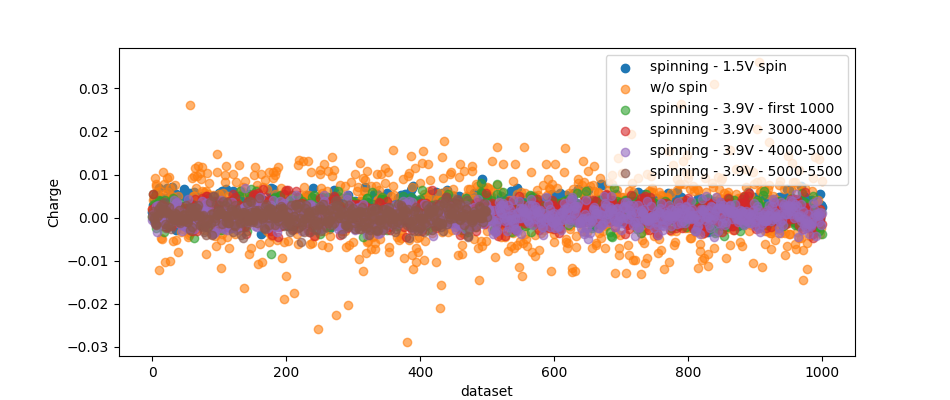

In [245]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(1000), amps4_x/scaleX, label='spinning - 1.5V spin')
ax.scatter(range(1000), amps6_x/scaleX, alpha=0.6, label='w/o spin')
# ax.scatter(range(len(amps8_x)), amps8_x/scaleX, alpha=0.6, label='spinning - 3.9V')
ax.scatter(range(len(amps10_x)), amps10_x/scaleX, alpha=0.6, label='spinning - 3.9V - first 1000')
ax.scatter(range(len(amps11_x)), amps11_x/scaleX, alpha=0.6, label='spinning - 3.9V - 3000-4000')
ax.scatter(range(len(amps12_x)), amps12_x/scaleX, alpha=0.6, label='spinning - 3.9V - 4000-5000')
ax.scatter(range(len(amps13_x)), amps13_x/scaleX, alpha=0.6, label='spinning - 3.9V - 5000-5500')
# ax.scatter(range(1000), amps5_x/scaleX3, label='X2')
ax.set(ylabel='Charge', xlabel='dataset')
ax.legend()

<IPython.core.display.Javascript object>


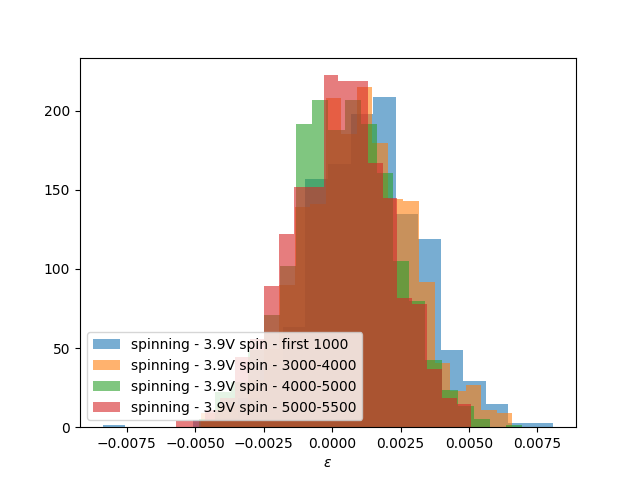

0.0022699576848493317 0.003565713516883217 0.001292375036567456 0.0008938693024780711 0.00040334882632276183 0.00028015065749407097
mean:  
1.29e-03 
8.94e-04 
4.03e-04 
2.80e-04
std:  5.84e-05


[Text(0.5, 0, '$\\epsilon$')]

In [254]:
_,ax = plt.subplots()
# _ = ax.hist(amps4_x/scaleX, bins=30, label='spinning - 1.5V spin')
# _ = ax.hist(amps8_x/scaleX, bins=30, alpha=0.6, label='spinning - 3.9V spin')
_ = ax.hist(amps10_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - first 1000')
_ = ax.hist(amps11_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 3000-4000')
_ = ax.hist(amps12_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 4000-5000')
_ = ax.hist(amps13_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 5000-5500')
print(np.mean(amps4_x/scaleX), np.mean(amps8_x/scaleX), np.mean(amps10_x/scaleX), np.mean(amps11_x/scaleX), 
      np.mean(amps12_x/scaleX), np.mean(amps13_x/scaleX))
print('mean: ', '\n{:.2e}'.format(np.mean(amps10_x/scaleX)), 
      '\n{:.2e}'.format(np.mean(amps11_x/scaleX)), 
      '\n{:.2e}'.format(np.mean(amps12_x/scaleX)),
     '\n{:.2e}'.format(np.mean(amps13_x/scaleX)))
print('std: ',  '{:.2e}'.format(np.std(amps12_x/scaleX)/np.sqrt(1000)))
ax.legend(loc='lower left')
ax.set(xlabel=r'$\epsilon$')

### EDM drift

In [6]:
bdf_force = load_dir(dirname='/data/new_trap/20200713/Bead1/ForceCalibration0713/', max_file=159)

45  files in folder
45  files loaded


In [7]:
gfw = GravityFramework.GravityFramework()
m1 = gfw.build_x_response(bdf_force[35:40], drive_freq=71, charges=3, bandwidth=1, decimate=10)
scaleX = gfw.scale_X2*1.6e-19 * 20 / 8e-3 * 0.61
scaleX3 = gfw.A2_mean/3
del gfw

***************************************************
X2-amplitude:  1.15e+01
reduced chi2:  0.41245700756482834
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.43666190382661274
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.24672195899486513
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.28891067079332633
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.32260914492812126
X3 to X2 ratio: 0.15
X2 response (amplitude): 11.670005668134127
X2 response (amplitude): 11.670005668134127


In [22]:
scaleX2 = np.mean([func3(bb) for bb in bdf_force[35:40]])/3

<ValueView of Minuit at 177fd9d8>
  A: 115.35294703776276
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.062206867206789696
<ValueView of Minuit at 177fd6d8>
  A: 116.41180505819602
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.03494667146982433
<ValueView of Minuit at 1f8e838>
  A: 118.25140355435565
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.07069513673772931
<ValueView of Minuit at 11e5cf28>
  A: 118.09059039007707
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.10840070069722696
<ValueView of Minuit at 11e58458>
  A: 117.11477617356513
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.06955702427213861


In [29]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.045, 'A2': 0.889, 'f2': drive_freq,
              'delta_phi': 0.0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
              'fix_A2': True}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [30]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 500000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) * 10
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_spin4 = np.array(pool.map(func1, range(5500)))
    pool.close()

0   ******************
70   ******************
175   ******************
140   ******************
210   ******************
245   ******************
315   ******************
35   ******************
280   ******************
350   ******************
490   ******************
105   ******************
525   ******************
420   ******************
455   ******************
385   ******************
595   ******************
665   ******************
630   ******************
735   ******************
560   ******************
770   ******************
700   ******************
875   ******************
805   ******************
910   ******************
1050   ******************
840   ******************
945   ******************
1330   ******************
1015   ******************
1085   ******************
1190   ******************
1155   ******************
1120   ******************
1260   ******************
1225   ******************
1295   ******************
1365   ******************
980   ************

498   ******************
1303   ******************
603   ******************
323   ******************
882   ******************
462   ******************
78   ******************
358   ******************
1233   ******************
987   ******************
1163   ******************
778   ******************
43   ******************
918   ******************
638   ******************
1198   ******************
1093   ******************
287   ******************
813   ******************
534   ******************
184   ******************
849   ******************
1374   ******************
708   ******************
673   ******************
147   ******************
1024   ******************
954   ******************
428   ******************
568   ******************
10   ******************
254   ******************
1128   ******************
112   ******************
394   ******************
1059   ******************
499   ******************
743   ******************
604   ******************
883   *************

51   ******************
1135   ******************
295   ******************
750   ******************
542   ******************
1100   ******************
1242   ******************
994   ******************
857   ******************
18   ******************
192   ******************
891   ******************
576   ******************
332   ******************
506   ******************
1067   ******************
716   ******************
822   ******************
681   ******************
225   ******************
612   ******************
261   ******************
1172   ******************
401   ******************
1382   ******************
926   ******************
87   ******************
1206   ******************
1312   ******************
471   ******************
1032   ******************
436   ******************
647   ******************
1346   ******************
366   ******************
963   ******************
1277   ******************
52   ******************
543   ******************
156   ************

94   ******************
164   ******************
1002   ******************
899   ******************
654   ******************
794   ******************
478   ******************
270   ******************
373   ******************
830   ******************
1107   ******************
127   ******************
232   ******************
971   ******************
724   ******************
1143   ******************
59   ******************
1040   ******************
933   ******************
758   ******************
1214   ******************
444   ******************
621   ******************
409   ******************
551   ******************
514   ******************
1354   ******************
1390   ******************
1076   ******************
201   ******************
28   ******************
341   ******************
584   ******************
303   ******************
691   ******************
1321   ******************
1285   ******************
866   ******************
165   ******************
1003   ***********

802   ******************
733   ******************
348   ******************
663   ******************
451   ******************
559   ******************
1048   ******************
1435   ******************
1151   ******************
1116   ******************
172   ******************
839   ******************
1011   ******************
766   ******************
381   ******************
1401   ******************
1470   ******************
1188   ******************
872   ******************
486   ******************
908   ******************
1328   ******************
1222   ******************
1258   ******************
699   ******************
1505   ******************
1362   ******************
135   ******************
592   ******************
417   ******************
240   ******************
629   ******************
209   ******************
1398   ******************
664   ******************
349   ******************
311   ******************
523   ******************
734   ******************
1294   ****

1861   ******************
1757   ******************
2559   ******************
1896   ******************
2036   ******************
1582   ******************
1547   ******************
1477   ******************
2245   ******************
2210   ******************
2767   ******************
1616   ******************
2384   ******************
2419   ******************
2524   ******************
2489   ******************
2629   ******************
1652   ******************
1443   ******************
2001   ******************
2663   ******************
2105   ******************
2314   ******************
1722   ******************
1966   ******************
1792   ******************
1687   ******************
2454   ******************
1514   ******************
2349   ******************
2140   ******************
2594   ******************
2733   ******************
2176   ******************
2070   ******************
1410   ******************
1758   ******************
2281   ******************
1931   *****

2567   ******************
2704   ******************
2775   ******************
1660   ******************
2532   ******************
2426   ******************
2461   ******************
1938   ******************
1418   ******************
2218   ******************
1450   ******************
2288   ******************
2392   ******************
1590   ******************
2741   ******************
2147   ******************
1729   ******************
1624   ******************
2356   ******************
2255   ******************
2112   ******************
2637   ******************
1695   ******************
1906   ******************
1485   ******************
1869   ******************
1835   ******************
1973   ******************
2184   ******************
1522   ******************
2670   ******************
1766   ******************
2497   ******************
2323   ******************
2009   ******************
2045   ******************
1801   ******************
2078   ******************
2776   *****

1877   ******************
1528   ******************
1945   ******************
2118   ******************
1458   ******************
2261   ******************
2575   ******************
2053   ******************
2226   ******************
2468   ******************
1772   ******************
2541   ******************
2296   ******************
2401   ******************
1668   ******************
1981   ******************
1564   ******************
2192   ******************
2677   ******************
2610   ******************
1491   ******************
2436   ******************
2646   ******************
2749   ******************
2504   ******************
2017   ******************
1844   ******************
1703   ******************
2783   ******************
1599   ******************
2713   ******************
1809   ******************
2365   ******************
2156   ******************
2086   ******************
1915   ******************
1459   ******************
1631   ******************
1428   *****

1604   ******************
2618   ******************
1923   ******************
2126   ******************
2304   ******************
2683   ******************
2269   ******************
1816   ******************
2790   ******************
2198   ******************
1710   ******************
2232   ******************
1572   ******************
1990   ******************
2165   ******************
2654   ******************
2095   ******************
2513   ******************
1537   ******************
1954   ******************
1885   ******************
1779   ******************
2063   ******************
1677   ******************
2550   ******************
1852   ******************
2583   ******************
1500   ******************
2758   ******************
1637   ******************
2801   ******************
1924   ******************
2199   ******************
2270   ******************
2305   ******************
1817   ******************
2338   ******************
1711   ******************
2127   *****

2807   ******************
3152   ******************
3502   ******************
2911   ******************
3188   ******************
2134   ******************
3746   ******************
2979   ******************
3607   ******************
3537   ******************
3781   ******************
3117   ******************
3083   ******************
3816   ******************
2691   ******************
3467   ******************
2482   ******************
1644   ******************
2377   ******************
3293   ******************
3572   ******************
3920   ******************
3433   ******************
2728   ******************
3050   ******************
3851   ******************
2842   ******************
3258   ******************
2946   ******************
2877   ******************
3398   ******************
3328   ******************
3712   ******************
2799   ******************
3503   ******************
2912   ******************
3886   ******************
3223   ******************
3363   *****

3579   ******************
3197   ******************
4135   ******************
4169   ******************
3754   ******************
3265   ******************
3684   ******************
3544   ******************
3440   ******************
3022   ******************
3615   ******************
3334   ******************
3859   ******************
4065   ******************
2955   ******************
3511   ******************
3159   ******************
2920   ******************
2988   ******************
3927   ******************
3124   ******************
2817   ******************
3406   ******************
3893   ******************
3301   ******************
2850   ******************
3998   ******************
3369   ******************
3719   ******************
3790   ******************
3476   ******************
3825   ******************
3092   ******************
3650   ******************
3231   ******************
4100   ******************
3963   ******************
2884   ******************
4031   *****

2927   ******************
3030   ******************
3587   ******************
3727   ******************
3308   ******************
3239   ******************
3900   ******************
3377   ******************
4142   ******************
3448   ******************
3797   ******************
3658   ******************
3692   ******************
4006   ******************
3832   ******************
3132   ******************
3414   ******************
3518   ******************
3066   ******************
3935   ******************
4073   ******************
2892   ******************
4107   ******************
4039   ******************
2859   ******************
3483   ******************
4179   ******************
3273   ******************
3206   ******************
3031   ******************
3867   ******************
3588   ******************
2997   ******************
3341   ******************
2928   ******************
3624   ******************
3167   ******************
3552   ******************
3763   *****

2867   ******************
3596   ******************
4115   ******************
3560   ******************
3699   ******************
3107   ******************
3140   ******************
3174   ******************
3526   ******************
3316   ******************
3004   ******************
3943   ******************
3456   ******************
3248   ******************
4015   ******************
2936   ******************
3665   ******************
3074   ******************
3840   ******************
3349   ******************
3038   ******************
2971   ******************
2831   ******************
3213   ******************
3805   ******************
3420   ******************
4151   ******************
3978   ******************
3491   ******************
2900   ******************
4048   ******************
3876   ******************
4080   ******************
3597   ******************
3561   ******************
4116   ******************
3908   ******************
3633   ******************
3735   *****

3779   ******************
4055   ******************
3392   ******************
3848   ******************
3706   ******************
3147   ******************
3672   ******************
4412   ******************
4273   ******************
4123   ******************
3289   ******************
4158   ******************
4342   ******************
4655   ******************
4690   ******************
4620   ******************
3568   ******************
4308   ******************
3182   ******************
4088   ******************
3499   ******************
4481   ******************
4516   ******************
3534   ******************
3427   ******************
4447   ******************
4023   ******************
3916   ******************
4239   ******************
4551   ******************
3952   ******************
3985   ******************
4206   ******************
4378   ******************
3357   ******************
3813   ******************
4725   ******************
4760   ******************
4413   *****

4905   ******************
4975   ******************
5496   ******************
4802   ******************
5149   ******************
4698   ******************
5427   ******************
4872   ******************
5394   ******************
4385   ******************
4558   ******************
4767   ******************
4523   ******************
4214   ******************
4594   ******************
4281   ******************
4489   ******************
5184   ******************
5289   ******************
5010   ******************
5255   ******************
5046   ******************
4628   ******************
4733   ******************
5324   ******************
4837   ******************
4317   ******************
4247   ******************
5360   ******************
5221   ******************
4351   ******************
4454   ******************
5497   ******************
4664   ******************
5462   ******************
5082   ******************
4941   ******************
5395   ******************
4420   *****

4426   ******************
5368   ******************
5122   ******************
4913   ******************
5333   ******************
5052   ******************
4393   ******************
4290   ******************
4707   ******************
5263   ******************
4949   ******************
5157   ******************
5435   ******************
4497   ******************
5192   ******************
5090   ******************
4672   ******************
5470   ******************
4531   ******************
4603   ******************
5403   ******************
4463   ******************
4224   ******************
4326   ******************
4845   ******************
5018   ******************
4360   ******************
5297   ******************
4567   ******************
4776   ******************
4742   ******************
4256   ******************
4882   ******************
5229   ******************
4985   ******************
5123   ******************
4637   ******************
4914   ******************
4812   *****

5236   ******************
4575   ******************
5410   ******************
4472   ******************
4716   ******************
4784   ******************
5099   ******************
4681   ******************
5305   ******************
5061   ******************
4923   ******************
4434   ******************
5200   ******************
5271   ******************
4264   ******************
4402   ******************
4750   ******************
4539   ******************
4820   ******************
5165   ******************
4891   ******************
4958   ******************
4299   ******************
4233   ******************
5443   ******************
5479   ******************
4368   ******************
4994   ******************
5377   ******************
4854   ******************
4335   ******************
4612   ******************
4646   ******************
5132   ******************
5237   ******************
4576   ******************
4717   ******************
5411   ******************
5342   *****

4547   ******************
5175   ******************
5418   ******************
5314   ******************
5246   ******************
5002   ******************
5209   ******************
4654   ******************
5035   ******************
5108   ******************
4863   ******************
4829   ******************
5487   ******************
5453   ******************
4794   ******************
5141   ******************
4444   ******************
4967   ******************
5387   ******************
4548   ******************
4932   ******************
4514   ******************
5281   ******************
5315   ******************
5176   ******************
5351   ******************
5071   ******************
5419   ******************
5247   ******************
5003   ******************
5036   ******************
5210   ******************
5454   ******************
5109   ******************
5142   ******************
4864   ******************
5488   ******************
4968   ******************
5388   *****

In [10]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs2 = {'A': 0, 'phi': 0.0, 'sigma': 1.,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_sigma': 1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_A': [-1000, 1000],
              'print_level': 0, 'fix_phi': True, 'fix_sigma': True}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [11]:
from scipy import signal
from iminuit import Minuit

def func100_cal(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200713/Bead1/ForceCalibration0713/Discharge_'+str(i)+'.h5'
    bb100 = BeadDataFile.BeadDataFile(fname=fname)
    
    fname = r'/data/new_trap/20200713/Bead1/ForceCalibration0713//Discharge_'+str(i+1)+'.h5'
    bb101 = BeadDataFile.BeadDataFile(fname=fname)
    
    ll.data_x = np.arange(0, len(bb100.x2)) / 5000
    ll.data_x = ll.data_x[5000:-5000:decimate]
    
    ll.harmoincs_freqs = [drive_freq]*4
    ll.harmoincs_noise = [1]*4
    ll.harmoincs_amp = [1., 0.889, 1., 0.889]
    ll.harmoincs_phases = [0,0,0,0]
    
    ll.data_y = [bb100.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000,
                bb100.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10,
                bb101.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000,
                bb101.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10]

    mimuit_minimizer = Minuit(ll.least_squares_multi_harmonics, **fit_kwargs2)
    mimuit_minimizer.migrad(ncall=50000)
    
    return mimuit_minimizer.values[0]

In [12]:
scaleX3 = np.mean([func100_cal(35), func100_cal(37), func100_cal(38)])/3

35   ******************
37   ******************
38   ******************


In [23]:
scaleX3, scaleX2

(39.03795185091207, 39.01476814759711)

In [75]:
from scipy import signal
from iminuit import Minuit

def func100(i, num_files=4):
    print(i,'  ******************')
    
    ll.harmoincs_freqs = []
    ll.harmoincs_noise = []
    ll.harmoincs_amp = []
    ll.harmoincs_phases = []
    ll.data_y = []
    
    for jj in range(num_files):
        
        fname = r'/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/Discharge_'+str(i+jj)+'.h5'
        bb100 = BeadDataFile.BeadDataFile(fname=fname)
        
        ll.harmoincs_freqs += [drive_freq]*2
        ll.harmoincs_noise += [1]*2
        ll.harmoincs_amp += [1., 0.889]
        ll.harmoincs_phases += [0]*2
        ll.data_y.append(bb100.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000)
        ll.data_y.append(bb100.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10)
        
    ll.data_x = np.arange(0, 50000) / 5000
    ll.data_x = ll.data_x[5000:-5000:decimate]
    
    mimuit_minimizer = Minuit(ll.least_squares_multi_harmonics, **fit_kwargs2)
    mimuit_minimizer.migrad(ncall=50000)
    
    return mimuit_minimizer.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_spin6 = np.array(pool.map(func100, range(0, 5500, 4)))
    pool.close()

180   ******************
36   ******************
0   ******************
72   ******************
216   ******************
144   ******************
288   ******************
252   ******************
324   ******************
432   ******************
360   ******************
108   ******************
468   ******************
396   ******************
540   ******************
648   ******************
576   ******************
756   ******************
504   ******************
684   ******************
720   ******************
792   ******************
828   ******************
900   ******************
864   ******************
936   ******************
1296   ******************
1260   ******************
1116   ******************
1152   ******************
612   ******************
1008   ******************
1224   ******************
1044   ******************
972   ******************
1188   ******************
1080   ******************
1368   ******************
1332   ******************
1404   ***********

1736   ******************
1908   ******************
1320   ******************
1360   ******************
1840   ******************
748   ******************
1944   ******************
1632   ******************
1000   ******************
92   ******************
1700   ******************
1876   ******************
1668   ******************
1564   ******************
1768   ******************
1980   ******************
564   ******************
1740   ******************
428   ******************
496   ******************
272   ******************
1912   ******************
880   ******************
1168   ******************
1804   ******************
1844   ******************
1948   ******************
1636   ******************
1704   ******************
2016   ******************
1452   ******************
1492   ******************
1984   ******************
1880   ******************
1528   ******************
1004   ******************
1032   ******************
1568   ******************
1744   *************

2216   ******************
2652   ******************
2760   ******************
2848   ******************
2712   ******************
1968   ******************
3168   ******************
2928   ******************
1184   ******************
3204   ******************
2444   ******************
2992   ******************
1936   ******************
2192   ******************
2512   ******************
2548   ******************
2956   ******************
2820   ******************
1076   ******************
2392   ******************
3240   ******************
2896   ******************
2328   ******************
3276   ******************
2604   ******************
3028   ******************
2156   ******************
3312   ******************
2468   ******************
2656   ******************
2796   ******************
2280   ******************
1972   ******************
2764   ******************
3348   ******************
2680   ******************
3384   ******************
2716   ******************
2552   *****

3968   ******************
4392   ******************
4152   ******************
4188   ******************
3300   ******************
3800   ******************
3704   ******************
2624   ******************
2372   ******************
4428   ******************
4464   ******************
3592   ******************
4296   ******************
4364   ******************
2976   ******************
3652   ******************
3416   ******************
4120   ******************
3912   ******************
4084   ******************
3940   ******************
3120   ******************
3336   ******************
4500   ******************
4044   ******************
4536   ******************
4260   ******************
4156   ******************
3840   ******************
4192   ******************
4368   ******************
4124   ******************
2296   ******************
4432   ******************
4324   ******************
3656   ******************
4216   ******************
4300   ******************
3916   *****

5104   ******************
5340   ******************
5416   ******************
4988   ******************
4780   ******************
4836   ******************
5304   ******************
5216   ******************
4532   ******************
5272   ******************
5248   ******************
5488   ******************
4912   ******************
5164   ******************
5132   ******************
4412   ******************
4340   ******************
5376   ******************
5108   ******************
5344   ******************
4596   ******************
5420   ******************
4664   ******************
4872   ******************
5252   ******************
4992   ******************
4568   ******************
5492   ******************
4488   ******************
4232   ******************
5448   ******************
4784   ******************
5276   ******************
5308   ******************
4020   ******************
4344   ******************
5136   ******************
5168   ******************
5380   *****

In [74]:
func100(200)/20/scaleX3

200   ******************


-0.0004950558306939923

In [43]:
len(mm_mle_spin5), 20*55

(1100, 1100)

In [77]:
# charge_mean = [np.mean(mm_mle_spin4[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]
# charge_std = [np.std(mm_mle_spin4[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]

# charge_mean2 = [np.mean(mm_mle_spin5[j*20:(j+1)*20])/20/scaleX3 for j in range(0,55)]
# charge_std2 = [np.std(mm_mle_spin5[j*20:(j+1)*20])/20/scaleX3 for j in range(0,55)]

charge_mean3 = [np.mean(mm_mle_spin6[j*25:(j+1)*25])/20/scaleX3 for j in range(0,55)]
charge_std3 = [np.std(mm_mle_spin6[j*25:(j+1)*25])/20/scaleX3 for j in range(0,55)]

<IPython.core.display.Javascript object>


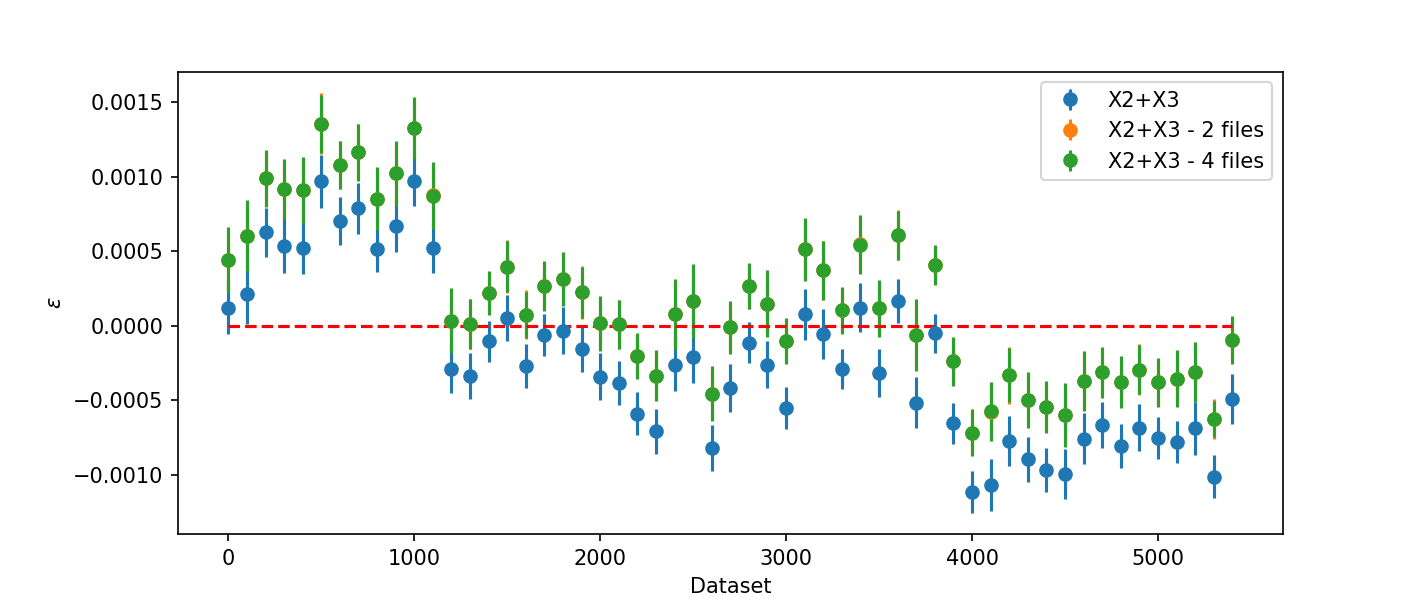

In [78]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5500,100), charge_mean, yerr=charge_std/np.sqrt(100),fmt='o', label='X2+X3')
ax.errorbar(np.arange(0,5500,100), charge_mean1, yerr=charge_std1/np.sqrt(50),fmt='o', label='X2+X3 - 2 files')
ax.errorbar(np.arange(0,5500,100), charge_mean3, yerr=charge_std3/np.sqrt(25),fmt='o', label='X2+X3 - 4 files')
# ax.errorbar(np.arange(0,5500,100), mm_mle_spin6[::2], yerr=charge_std2/np.sqrt(2000),fmt='o', label='X2+X3 - 50 files')
ax.plot(np.arange(0,5500,100), np.arange(0,5500,100)*0, 'r--')
ax.set(xlabel='Dataset', ylabel=r'$\epsilon$')
ax.legend()

### Discriminator

In [30]:
bdf_mCharge = load_dir(dirname='/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/', start_file=5000, max_file=1)

6000  files in folder
1  files loaded


In [32]:
bb1 = bdf_mCharge[0]
bb2 = bdf_force[35]

In [41]:
2*np.pi/71

0.08849556770675474

In [39]:
5000/71

70.4225352112676

<IPython.core.display.Javascript object>


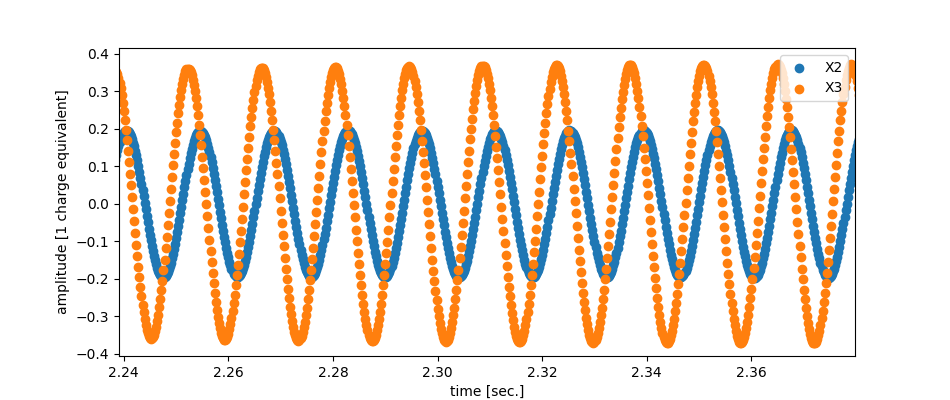

[Text(0, 0.5, 'amplitude [1 charge equivalent]'), Text(0.5, 0, 'time [sec.]')]

In [373]:
_,ax = plt.subplots(figsize=(9.5,4))
bb = bb1
ax.scatter(np.arange(50000)/5000, bb.response_at_freq2('x', drive_freq=71)[:50000]*500000/scaleX2, label='X2')
ax.scatter(np.arange(50000)/5000, bb.response_at_freq3('x', drive_freq=71)[:50000]*10/scaleX2/0.889, label='X3')
ax.legend()
ax.set(xlabel='time [sec.]', ylabel='amplitude [1 charge equivalent]')

In [291]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': 0, 'A2': 0.889, 'f2': drive_freq,
              'delta_phi': 0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [-1000, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
              'fix_A2': True}
bandwidth=5
decimate = 5
ll = likelihood_analyser.LikelihoodAnalyser()

In [21]:
def func3(bb):
    
    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 500000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) * 10
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)

    print(m1_tmp.values)
    return m1_tmp.values[0]

In [293]:
func3(bb1), func3(bb2)

<ValueView of Minuit at 2622e8f8>
  A: -0.09643348479607994
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: 0.0
  delta_phi: 0.0
<ValueView of Minuit at 2ef6ade8>
  A: 11.44440073267549
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: 0.0
  delta_phi: 0.0


(-0.09643348479607994, 11.44440073267549)

In [353]:
def func2(bb):
    
    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 500000
    xx2 = xx2[5000:-5000]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) * 10
    xx3 = xx3[5000:-5000]  # cut out the first and last second
    cycles = 10
    m1_tmp = [ll.find_mle_2sin(xx2[(5000*cycles*i)//71:(5000*cycles*(i+1))//71], 
                               xx3[(5000*cycles*i)//71:(5000*cycles*(i+1))//71],
                               fsamp=5000, noise_rms=1, noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs) for i in range(int(frequency*8/cycles))]


    return m1_tmp

In [213]:
mm1 = func2(bb1)
mm2 = func2(bb2)

In [214]:
tmp1 = [mm_.values[0] for mm_ in mm1]
tmp2 = [mm_.values[0] for mm_ in mm2]

<IPython.core.display.Javascript object>


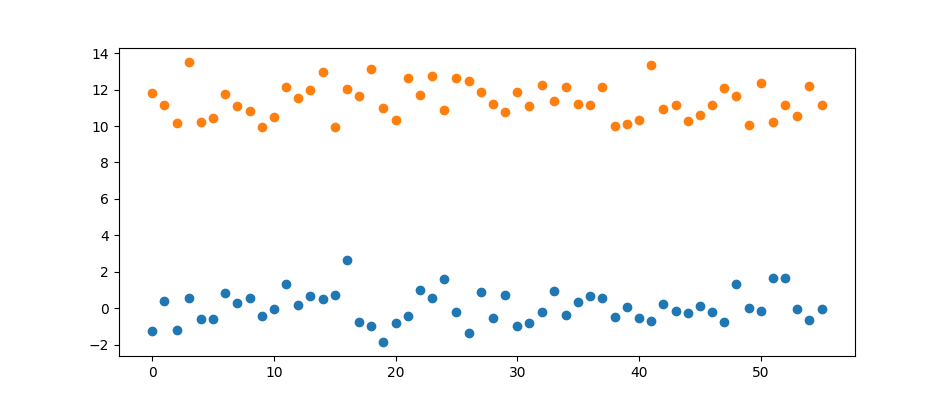

In [215]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(tmp1)), tmp1)
ax.scatter(range(len(tmp1)), tmp2)

In [216]:
print(np.mean(tmp1), func3(bb1))
print(np.mean(tmp2), func3(bb2))

0.06368335169895138 0.03893910834972303
11.387029357752885 11.451982004302636


In [209]:
print('{:.2e}'.format(np.mean(tmp1)/np.mean(tmp2)/20))

2.80e-04


In [367]:
def func4(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 500000
    xx2 = xx2[5000:-5000]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) * 10
    xx3 = xx3[5000:-5000]  # cut out the first and last second
    cycles = 2
    m1_tmp = [ll.find_mle_2sin(xx2[(5000*cycles*i)//71:(5000*cycles*(i+1))//71], 
                               xx3[(5000*cycles*i)//71:(5000*cycles*(i+1))//71],
                               fsamp=5000, noise_rms=1, noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs) for i in range(int(frequency*8/cycles))]


    return np.mean([mm_.values[0] for mm_ in m1_tmp])

if __name__ == '__main__':
    pool = Pool(processes=20)                         # Create a multiprocessing Pool
    test_disc50 = np.array(pool.map(func4, range(5500)))
    pool.close()

345   ******************
276   ******************
138   ******************
414   ******************
483   ******************
69   ******************
207   ******************
0   ******************
621   ******************
552   ******************
966   ******************
1104   ******************
1035   ******************
759   ******************
690   ******************
897   ******************
828   ******************
1311   ******************
1242   ******************
1173   ******************
1174   ******************
1   ******************
1312   ******************
1243   ******************
1105   ******************
346   ******************
208   ******************
1036   ******************
760   ******************
967   ******************
898   ******************
277   ******************
139   ******************
553   ******************
622   ******************
70   ******************
484   ******************
415   ******************
829   ******************
691   ***************

1328   ******************
775   ******************
1189   ******************
1258   ******************
430   ******************
706   ******************
844   ******************
154   ******************
292   ******************
499   ******************
361   ******************
914   ******************
17   ******************
85   ******************
983   ******************
223   ******************
1121   ******************
1051   ******************
1190   ******************
1329   ******************
569   ******************
638   ******************
1259   ******************
776   ******************
707   ******************
293   ******************
845   ******************
500   ******************
915   ******************
86   ******************
362   ******************
431   ******************
155   ******************
224   ******************
18   ******************
984   ******************
1122   ******************
1330   ******************
777   ******************
1260   ************

1274   ******************
860   ******************
1205   ******************
515   ******************
930   ******************
377   ******************
999   ******************
34   ******************
446   ******************
170   ******************
792   ******************
239   ******************
1067   ******************
309   ******************
1137   ******************
1345   ******************
723   ******************
654   ******************
102   ******************
1275   ******************
585   ******************
1206   ******************
861   ******************
516   ******************
378   ******************
931   ******************
1000   ******************
35   ******************
171   ******************
447   ******************
1138   ******************
793   ******************
1068   ******************
240   ******************
1346   ******************
310   ******************
655   ******************
724   ******************
103   ******************
1276   *********

50   ******************
946   ******************
1361   ******************
1083   ******************
1015   ******************
670   ******************
393   ******************
808   ******************
325   ******************
118   ******************
1291   ******************
601   ******************
255   ******************
462   ******************
532   ******************
1222   ******************
186   ******************
739   ******************
877   ******************
1154   ******************
947   ******************
51   ******************
1084   ******************
1362   ******************
1016   ******************
671   ******************
394   ******************
326   ******************
809   ******************
602   ******************
463   ******************
1292   ******************
1223   ******************
119   ******************
533   ******************
187   ******************
740   ******************
256   ******************
1155   ******************
948   *********

1377   ******************
202   ******************
755   ******************
1099   ******************
617   ******************
1238   ******************
478   ******************
67   ******************
548   ******************
1307   ******************
1032   ******************
409   ******************
963   ******************
687   ******************
1170   ******************
825   ******************
134   ******************
893   ******************
271   ******************
341   ******************
1378   ******************
756   ******************
203   ******************
1100   ******************
1239   ******************
618   ******************
1308   ******************
68   ******************
479   ******************
549   ******************
964   ******************
1033   ******************
410   ******************
688   ******************
1171   ******************
135   ******************
826   ******************
894   ******************
272   ******************
342   *********

2357   ******************
2426   ******************
2082   ******************
2495   ******************
2013   ******************
1875   ******************
1806   ******************
1738   ******************
2288   ******************
1394   ******************
2701   ******************
1669   ******************
1600   ******************
1463   ******************
1944   ******************
2151   ******************
2564   ******************
1532   ******************
2633   ******************
2358   ******************
2220   ******************
2427   ******************
2496   ******************
2083   ******************
1807   ******************
2014   ******************
1876   ******************
1739   ******************
2289   ******************
1395   ******************
2702   ******************
1670   ******************
1601   ******************
1945   ******************
2152   ******************
1464   ******************
2565   ******************
2634   ******************
1533   *****

2098   ******************
2579   ******************
1409   ******************
1548   ******************
2648   ******************
2511   ******************
2235   ******************
1959   ******************
2304   ******************
1754   ******************
2029   ******************
2442   ******************
2373   ******************
1822   ******************
1685   ******************
1479   ******************
2167   ******************
1616   ******************
2099   ******************
2717   ******************
1892   ******************
2580   ******************
1410   ******************
1549   ******************
2305   ******************
2512   ******************
2236   ******************
2649   ******************
1960   ******************
1755   ******************
2374   ******************
2030   ******************
2443   ******************
1686   ******************
1823   ******************
1480   ******************
2718   ******************
2168   ******************
1617   *****

2457   ******************
2182   ******************
1837   ******************
2594   ******************
1425   ******************
2527   ******************
2114   ******************
2389   ******************
2045   ******************
2732   ******************
2663   ******************
2320   ******************
1565   ******************
1771   ******************
1701   ******************
1908   ******************
1495   ******************
2251   ******************
1632   ******************
1975   ******************
2183   ******************
2458   ******************
1838   ******************
2595   ******************
1426   ******************
2528   ******************
2115   ******************
2390   ******************
2733   ******************
2046   ******************
2664   ******************
2321   ******************
1566   ******************
1772   ******************
1909   ******************
1702   ******************
1496   ******************
2184   ******************
2252   *****

2473   ******************
1647   ******************
1853   ******************
1923   ******************
2610   ******************
1510   ******************
2336   ******************
2198   ******************
1441   ******************
2543   ******************
2405   ******************
2266   ******************
1581   ******************
2061   ******************
1787   ******************
1717   ******************
2748   ******************
2130   ******************
2474   ******************
2679   ******************
1991   ******************
1648   ******************
1854   ******************
1924   ******************
2611   ******************
1511   ******************
2337   ******************
2199   ******************
1442   ******************
2544   ******************
2406   ******************
2062   ******************
2267   ******************
1582   ******************
1788   ******************
1718   ******************
2475   ******************
2749   ******************
2131   *****

3662   ******************
2837   ******************
3318   ******************
3181   ******************
3731   ******************
4006   ******************
3387   ******************
2906   ******************
3456   ******************
3937   ******************
2974   ******************
3113   ******************
3525   ******************
2770   ******************
3250   ******************
3869   ******************
3594   ******************
3800   ******************
3044   ******************
4075   ******************
3663   ******************
3182   ******************
2838   ******************
3319   ******************
3732   ******************
4007   ******************
3388   ******************
2907   ******************
3457   ******************
3938   ******************
2975   ******************
3114   ******************
2771   ******************
3526   ******************
3251   ******************
3595   ******************
3870   ******************
3801   ******************
3045   *****

3540   ******************
3334   ******************
3884   ******************
3197   ******************
3128   ******************
4022   ******************
2990   ******************
2853   ******************
3815   ******************
2786   ******************
2922   ******************
4090   ******************
3610   ******************
3472   ******************
3403   ******************
3679   ******************
3266   ******************
3747   ******************
3541   ******************
3335   ******************
3060   ******************
3885   ******************
3953   ******************
3198   ******************
2854   ******************
2991   ******************
3129   ******************
4023   ******************
2787   ******************
3816   ******************
2923   ******************
3611   ******************
4091   ******************
3404   ******************
3473   ******************
3680   ******************
3748   ******************
3267   ******************
3336   *****

2869   ******************
3556   ******************
3487   ******************
4038   ******************
3350   ******************
3075   ******************
2802   ******************
3006   ******************
3900   ******************
3831   ******************
4106   ******************
3694   ******************
2938   ******************
3626   ******************
3144   ******************
3213   ******************
3968   ******************
3419   ******************
3763   ******************
3282   ******************
3557   ******************
2870   ******************
4039   ******************
3488   ******************
3351   ******************
3901   ******************
3007   ******************
3832   ******************
3076   ******************
2803   ******************
3695   ******************
3627   ******************
4107   ******************
3214   ******************
2939   ******************
3969   ******************
3420   ******************
3764   ******************
3145   *****

3572   ******************
2885   ******************
4054   ******************
3434   ******************
3159   ******************
2953   ******************
3778   ******************
3503   ******************
3228   ******************
2818   ******************
3847   ******************
3297   ******************
3710   ******************
3091   ******************
3022   ******************
3984   ******************
3642   ******************
3917   ******************
3367   ******************
2886   ******************
4122   ******************
4055   ******************
3160   ******************
2954   ******************
3573   ******************
3435   ******************
2819   ******************
3229   ******************
3848   ******************
3779   ******************
3298   ******************
3504   ******************
3023   ******************
3092   ******************
3985   ******************
3643   ******************
3711   ******************
2887   ******************
4123   *****

3862   ******************
4212   ******************
4486   ******************
4555   ******************
4145   ******************
4830   ******************
4899   ******************
4280   ******************
4000   ******************
4624   ******************
4349   ******************
3793   ******************
4137   ******************
3932   ******************
4418   ******************
4693   ******************
4968   ******************
5037   ******************
4762   ******************
5106   ******************
3863   ******************
4213   ******************
4487   ******************
4146   ******************
4556   ******************
4900   ******************
4831   ******************
4281   ******************
4001   ******************
4625   ******************
4350   ******************
3794   ******************
4694   ******************
5175   ******************
4419   ******************
4138   ******************
4969   ******************
5038   ******************
4763   *****

5395   ******************
4433   ******************
4570   ******************
5258   ******************
5121   ******************
4502   ******************
5327   ******************
4640   ******************
4228   ******************
4778   ******************
5053   ******************
5463   ******************
4709   ******************
4984   ******************
4846   ******************
4365   ******************
4916   ******************
4296   ******************
5190   ******************
4161   ******************
5396   ******************
4434   ******************
4571   ******************
5259   ******************
5328   ******************
5122   ******************
4503   ******************
4641   ******************
4229   ******************
4779   ******************
5464   ******************
5054   ******************
4985   ******************
4366   ******************
4847   ******************
4710   ******************
4917   ******************
4297   ******************
5191   *****

4243   ******************
5068   ******************
4380   ******************
5137   ******************
4518   ******************
4449   ******************
4656   ******************
4794   ******************
5205   ******************
4176   ******************
5274   ******************
5343   ******************
4311   ******************
4725   ******************
4932   ******************
5479   ******************
4587   ******************
5000   ******************
4862   ******************
5069   ******************
4244   ******************
4381   ******************
5412   ******************
4519   ******************
5138   ******************
4657   ******************
5206   ******************
4450   ******************
4795   ******************
4177   ******************
5344   ******************
5275   ******************
4726   ******************
4312   ******************
4933   ******************
4588   ******************
5001   ******************
5480   ******************
5070   *****

4259   ******************
5084   ******************
5427   ******************
5358   ******************
5221   ******************
4396   ******************
4672   ******************
4810   ******************
4603   ******************
5015   ******************
5494   ******************
4877   ******************
5290   ******************
4465   ******************
4741   ******************
4327   ******************
4948   ******************
4535   ******************
4192   ******************
5153   ******************
5428   ******************
5085   ******************
5359   ******************
4260   ******************
4397   ******************
5222   ******************
5495   ******************
4673   ******************
4811   ******************
5016   ******************
4604   ******************
5291   ******************
4878   ******************
4328   ******************
4949   ******************
4466   ******************
4536   ******************
4742   ******************
4261   *****

5168   ******************
4964   ******************
4756   ******************
4619   ******************
4551   ******************
5444   ******************
4343   ******************
5306   ******************
4207   ******************
4413   ******************
5238   ******************
5032   ******************
4481   ******************
4827   ******************
5101   ******************
4893   ******************
5375   ******************
4276   ******************
4689   ******************
5169   ******************
4965   ******************
4552   ******************
4757   ******************
4620   ******************
5445   ******************
4344   ******************
5307   ******************
4208   ******************
4414   ******************
5033   ******************
5239   ******************
4482   ******************
5102   ******************
4828   ******************
4277   ******************
4894   ******************
5170   ******************
4690   ******************
5376   *****

In [156]:
np.mean(test_disc)/20/11, np.std(test_disc)/20/11

(0.0008829417516484188, 0.0012482478486546586)

In [368]:
charge_means2 = [np.mean(test_disc[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]
charge_std2 = [np.std(test_disc[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]

charge_means50 = [np.mean(test_disc50[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]
charge_std50 = [np.std(test_disc50[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]

<IPython.core.display.Javascript object>


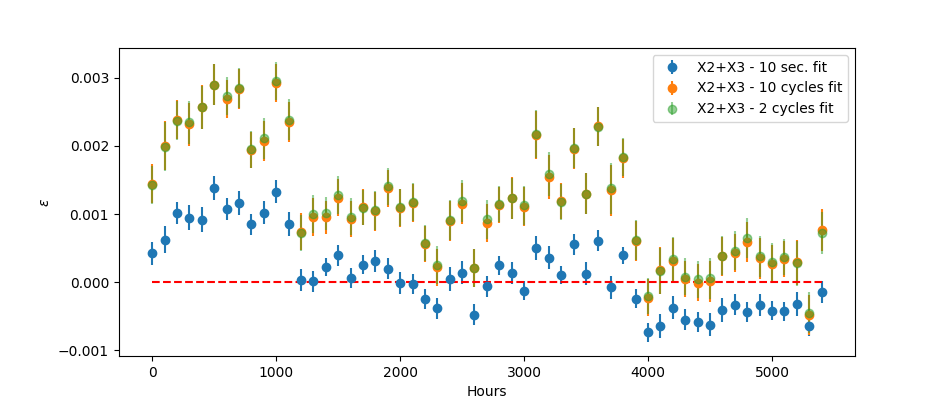

In [370]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5500,100), charge_mean, yerr=charge_std/np.sqrt(100),fmt='o', label='X2+X3 - 10 sec. fit')
ax.errorbar(np.arange(0,5500,100), charge_means2, yerr=charge_std2/np.sqrt(100),fmt='o', label='X2+X3 - 10 cycles fit')
ax.errorbar(np.arange(0,5500,100), charge_means50, yerr=charge_std2/np.sqrt(100),fmt='o', label='X2+X3 - 2 cycles fit', alpha=0.5)

ax.plot(np.arange(0,5500,100), np.arange(0,5500,100)*0, 'r--')
ax.set(xlabel='Hours', ylabel=r'$\epsilon$')
ax.legend()

In [43]:
xx2 = bb.response_at_freq2('x', 71) * 50000
analytic_signal2 = signal.hilbert(xx2)

xx21= bb1.response_at_freq2('x', 71) * 50000
analytic_signal21 = signal.hilbert(xx21)

In [44]:
np.abs(sum(analytic_signal2)), np.abs(sum(analytic_signal21))

(0.6463541051535616, 0.6463541051535616)

<IPython.core.display.Javascript object>


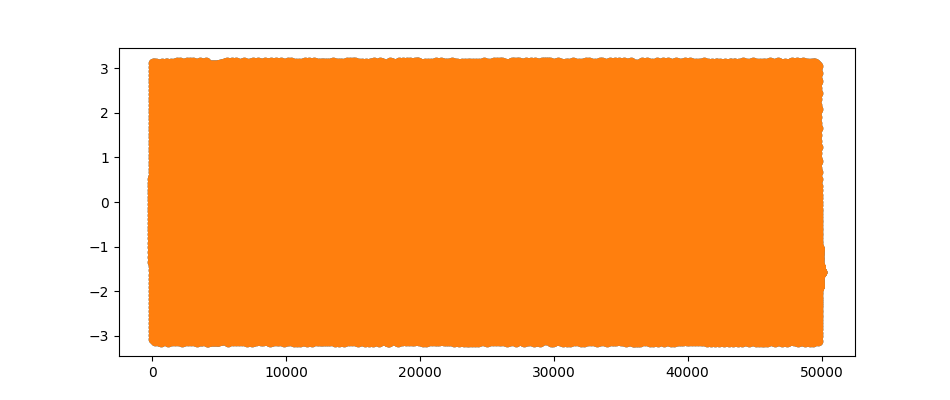

In [45]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(50000), np.angle(analytic_signal2))
ax.scatter(range(50000), np.angle(analytic_signal21))